when range bound pos = 0.3 lev = 10
when not pos = 0.4 lev = 10
do 0.35 poss

In [495]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [496]:
df = pd.read_csv('BTC_daily.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
3191,2023-06-13,25902.941406,26376.351562,25728.365234,25918.728516,25918.728516,14143474486
3192,2023-06-14,25920.257812,26041.800781,24902.152344,25124.675781,25124.675781,14265717766
3193,2023-06-15,25121.673828,25735.308594,24797.167969,25576.394531,25576.394531,15837384409
3194,2023-06-16,25575.283203,26463.173828,25245.357422,26327.462891,26327.462891,16324646965


In [497]:
data = df['Close'].values
lows = df['Low'].values
highs = df['High']

In [498]:
def SMA(n , dat):
    sma_list = [0] * (n - 1)
    for i in range(n, dat.shape[0]+1):
        sma_list.append(np.mean(dat[i-n:i]))
    return(sma_list)

In [499]:
def CUTS(sma1 , sma2): # sma1 shorter than sma2
    buy = []
    sell = []
    old = 1
    for i in range(len(sma1)):
        if (sma1[i]>=sma2[i]):
            new = 1
        else:
            new = -1
        if (old != new):
            if (new==-1) :
                sell.append(i)
            else:
                buy.append(i)
        old = new
    return buy , sell

In [1]:
def PROFITS (buys , sells , lows , highs, data , l , pos):
    fees = 0.9999
    profit = []
    if (len(buys)>0):
        if (buys[0] > sells[0]):
            for i in range(len(buys)):
                maxi = np.max(highs[sells[i]:buys[i]+1])
                allowed = data[sells[i]] * (1 + 1/l)*(fees**(4*(buys[i] - sells[i] + np.argmax(highs[sells[i]:buys[i]+1]))))
                if (allowed > maxi):
                    p =  (((data[sells[i]] - data[buys[i]])/data[buys[i]])*l*pos)*(fees**(4*(buys[i] - sells[i])))
                    profit.append(p)
                else:
                    p = -1 * pos*(fees**(4*(buys[i] - sells[i] + np.argmax(highs[sells[i]:buys[i]+1]))))
                    profit.append(p)
                if (i!=(len(buys)-1)):
                    mini = np.min(lows[buys[i]:sells[i+1]])
                    allowed = data[buys[i]] * (1 - 1/l)/(fees**(4*(buys[i] - sells[i+1] + np.argmin(lows[buys[i]:sells[i+1]+1]))))
                    if (allowed < mini):
                        p = (((data[sells[i+1]] - data[buys[i]+1])/data[buys[i]])*l*pos)*(fees**(4*(sells[i+1] - buys[i])))
                        profit.append(p)
                    else:
                        p = -1 * pos*(fees**(4*(buys[i] - sells[i+1] + np.argmin(lows[buys[i]:sells[i+1]+1]))))
                        profit.append(p)
        else :
            for i in range(len(buys)):
                print("shit, we fuckedup in PROFITS function")
                p = (((data[sells[i]] - data[buys[i]])/data[buys[i]])*l*p)/(fees**(4*sells[i] - buys[i]))
                profit.append(p)
    return profit

In [509]:
def RATE(profs):
    fees = 0.999
    if (len(profs)>0):
        numtrades = len(profs)
        maxdrawdown = min(profs) 
        maxwin = max(profs)
        allprofit = 1
        multiplyer = [1] # your money in time
        for i in profs: 
            multiplyer.append(allprofit * (1 + i) * fees)
            allprofit = allprofit * (1 + i)*fees
        return numtrades , maxdrawdown , maxwin , allprofit , multiplyer 
    else:
        return 0 , 0  , 0 , 1 , [1]

In [518]:
N = 1095
smas = np.zeros((200 , N) , dtype = float)
for i in range (200):
    smas [i , :] = SMA(i+1 , data[-N:])

In [519]:
levs = np.linspace (1 , 100 , num = 100)
poss = np.linspace (0.1 , 1 , num = 90)
allprofits = np.zeros ((len(levs) , len(poss)))
for i in range(len(levs)) :
    for j in range(len(poss)) :
        l = levs[i]
        p = poss[j]
        buy , sell = CUTS(smas[30 , :] , smas[35 , :])
        profits = PROFITS(buy , sell,lows[-N:] , highs[-N:] , data[-N:] , l , p)
        numtrades , maxdrawdown , maxwin , allprofit , multiplyer = RATE(profits)
        allprofits[i][j] = allprofit

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [520]:
print(np.max(allprofits))
print(allprofits[np.where(levs , 10)][np.where(poss = 0.35)])

413.0125712490281


ValueError: either both or neither of x and y should be given

In [521]:
maxrow, maxcol = np.unravel_index(np.argmax(allprofits), allprofits.shape)
print("Best combination: " + str(levs[maxrow]) + " , " + str(poss[maxcol]))

Best combination: 10.0 , 0.42359550561797754


In [241]:
flattened_arr = allprofits.flatten()

# Get the indexes of the 20 largest numbers
indexes = np.argpartition(flattened_arr, -20)[-20:]

# Convert flat indexes to row and column indexes
row_indexes, col_indexes = np.unravel_index(indexes, allprofits.shape)

print(np.array(levs)[row_indexes])
print(np.array(poss)[col_indexes])

[50  3 10  3  3  3  3 20 10 20 10  2  2  2  2  2 20  5  5 10]
[0.1 0.4 0.4 0.5 0.6 0.7 0.8 0.3 0.2 0.2 0.1 1.  0.9 0.8 0.7 0.6 0.1 0.3
 0.4 0.3]


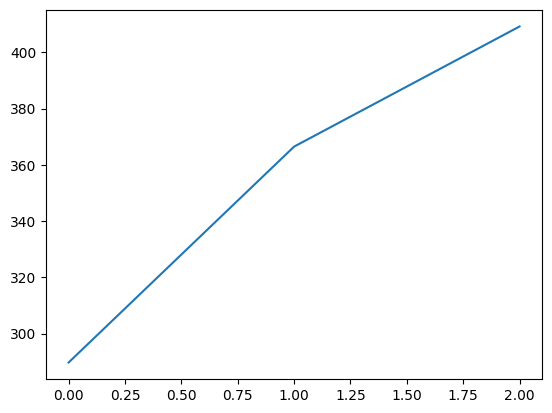

In [516]:
plt.plot(allprofits[5 , :])

In [240]:
np.max(allprofits)

12231.689443405403

In [242]:
allprofits[4][3]

464.84177030427685

In [226]:
levs0 = np.array(levs)[row_indexes]
poss0 = np.array(poss)[row_indexes]
print(levs0)
print(poss0)

[ 5 10  5 20  5 10 20 20 20 20 20 20 20 10 10 10 10 10  5 20]
[0.3 0.4 0.3 0.5 0.3 0.4 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.4 0.4 0.4 0.4 0.4
 0.3 0.5]


In [219]:
levs1 = np.array(levs)[row_indexes]
poss1 = np.array(poss)[row_indexes]
print(levs1)
print(poss1)

[ 2  5  5 10  3  2  3  2  3  5  2  3  2  2 10  3  5  5 10  3]
[0.1 0.3 0.3 0.4 0.2 0.1 0.2 0.1 0.2 0.3 0.1 0.2 0.1 0.1 0.4 0.2 0.3 0.3
 0.4 0.2]


In [210]:
levs2 = np.array(levs)[row_indexes]
poss2 = np.array(poss)[row_indexes]
print(levs2)
print(poss2)

[ 2  3  5 20  2  3  3  3  3  3 20  2  2  2 20 20 10 10 10 10]
[0.1 0.2 0.3 0.5 0.1 0.2 0.2 0.2 0.2 0.2 0.5 0.1 0.1 0.1 0.5 0.5 0.4 0.4
 0.4 0.4]


In [204]:
levs3=np.array(levs)[row_indexes]
poss3 = np.array(poss)[row_indexes]
print(levs3)
print(poss3)

[10 20  5  5  3  2  2  5  5  3 20  3  3  3 20 10 10 10 10 10]
[0.4 0.5 0.3 0.3 0.2 0.1 0.1 0.3 0.3 0.2 0.5 0.2 0.2 0.2 0.5 0.4 0.4 0.4
 0.4 0.4]


In [494]:
N = 1095
smas = np.zeros((200 , N) , dtype = float)
for i in range (200):
    smas [i , :] = SMA(i+1 , data[-N:])
buy , sell = CUTS(smas[30 , :] , smas[35 , :])
profits = PROFITS(buy , sell,lows[-N:] , highs[-N:] , data[-N:] , 3 , 1)
numtrades , maxdrawdown , maxwin , allprofit , multiplyer = RATE(profits)
allprofit

6.018838623423048

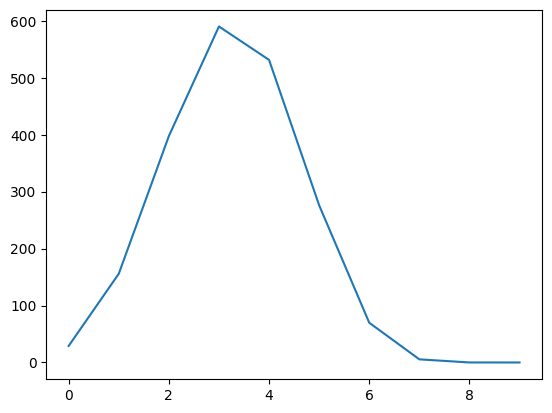

In [237]:
plt.plot(allprofits[4 , :])

In [156]:
shorts

[10369.5634765625,
 46196.46484375,
 52774.265625,
 63109.6953125,
 60683.8203125,
 56473.03125,
 57828.05078125,
 39974.89453125,
 59697.1953125,
 57806.56640625,
 46453.56640625,
 40458.30859375,
 19141.484375,
 20602.81640625,
 16669.439453125,
 17364.865234375,
 22353.349609375,
 28175.81640625,
 26804.990234375]

In [157]:
sa

[11406.51982421875,
 50816.11132812501,
 58051.692187500004,
 69420.66484375001,
 66752.20234375,
 62120.334375000006,
 63610.855859375006,
 43972.383984375,
 65666.91484375001,
 63587.223046875006,
 51098.923046875,
 44504.139453125004,
 21055.6328125,
 22663.098046875002,
 18336.3833984375,
 19101.351757812503,
 24588.684570312504,
 30993.398046875,
 29485.489257812504]

In [158]:
maxs

[11134.0927734375,
 48745.734375,
 57262.3828125,
 64863.09765625,
 62572.17578125,
 57062.1484375,
 59519.35546875,
 42541.6796875,
 60004.42578125,
 59113.40234375,
 47313.4765625,
 40713.890625,
 19889.146484375,
 21053.24609375,
 18318.53125,
 17846.744140625,
 22613.685546875,
 28803.3359375,
 27646.34765625]

(2000.0, 3000.0)

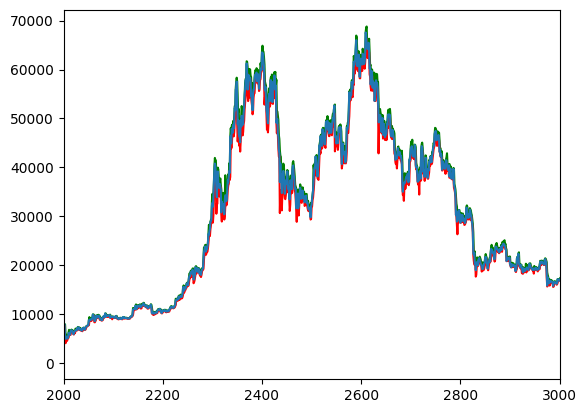

In [134]:
plt.plot(highs , color = 'green')
plt.plot(lows , color = 'red')
plt.plot(data)
plt.xlim(2000 , 3000)

In [135]:
highs[sell[0]]

388.5759887695313

In [136]:
sell[0]

35

In [137]:
buy[0]

40

In [138]:
print((np.sum(np.array(profits)>0))/numtrades)

0.5918367346938775


In [139]:
numtrades

49

In [140]:
profits

[-0.10020021015408859,
 -0.06808417507523427,
 -0.02840199173050428,
 3.475024011633252,
 -0.019336818228913803,
 0.08747945514566174,
 -0.05722506212820744,
 0.12882311711091396,
 0.024980780502072607,
 0.0,
 0.07950422697828677,
 0.013330056564508844,
 0.09108039122123923,
 0.13057168340946504,
 0.7308873606829103,
 0.0,
 -0.10064208458367517,
 0.015247870954913615,
 0.01972500266463361,
 0.14114779059077004,
 -0.10080324887440703,
 0.04161590635716388,
 0.08931496814969735,
 0.010189825183002354,
 0.5274948843005536,
 0.0562773707052739,
 -0.10056159909015668,
 0.048071603406408314,
 0.019718429085294684,
 -0.10080324887440703,
 0.7674637106371303,
 -0.10161294983635642,
 -0.10157231075279244,
 -0.014089958501027839,
 -0.0034894516437572105,
 0.054271609700166326,
 0.29758081031591677,
 -0.05792563546587522,
 -0.06506196985403367,
 0.0,
 0.04310968956660673,
 0.004124731116736677,
 -0.10048117796250156,
 0.05736753123369034,
 0.008572816656820638,
 0.1801408003695608,
 0.00649594691